In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import math

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

cov:
 [[ 1.05690355  0.90465433  3.01846142]
 [ 0.90465433  9.86051491 11.66982356]
 [ 3.01846142 11.66982356 17.70674641]] 

Eigenvalues using eigendecomposition:
 [2.64453599e+01 3.35158057e-16 2.17880501e+00] 

Eigenvectors using eigendecomposition:
 [[-0.11672678 -0.81649658  0.56542744]
 [-0.57577758 -0.40824829 -0.70838796]
 [-0.80923114  0.40824829  0.42246692]] 

Eigenvalues using SVD:
 [2.64592335e+01 2.17898710e+00 8.14230720e-32] 

Eigenvectors using SVD:
 [[-0.11668975  0.56543508 -0.81649658]
 [-0.57582397 -0.70835026 -0.40824829]
 [-0.80920347  0.42251991  0.40824829]] 

Dataset's variability: [0.9239133210128961, 0.07608667898710379, 2.8431609999679834e-33] 



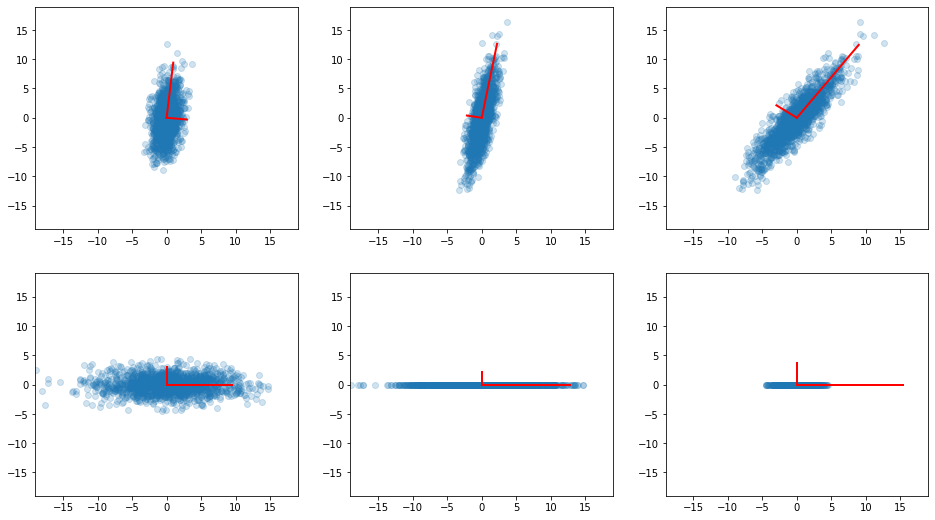

In [6]:
# Utility function used to draw scatter plot
def displaySubplot(ax, xMaxVal, X_0, X_1, l, V, scale_factor):
    ax.scatter(X_0, X_1, alpha=0.2)
    ax.set_xlim([-xMaxVal, xMaxVal])
    ax.set_ylim([-xMaxVal, xMaxVal])
    
    for li, vi in zip(l, V.T):
        if li * vi[0] < 0 and li * vi[1] < 0:
            ax.plot([0, -scale_factor * li * vi[0]], [0, -scale_factor * li * vi[1]], 'r-', lw=2)
        else:
            ax.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

N = 1500

# Generating the dataset
X1 = np.random.normal(loc=0, scale=1, size=N)
X2 = X1 + np.random.normal(loc=0, scale=3, size=N)
X3 = 2*X1 + X2
X = np.row_stack((X1, X2, X3))

# Eigenvectors and eigenvaues using eigendecomposition of the covariance matrix
cov = np.cov(X)
print("cov:\n", cov, '\n')

l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues using eigendecomposition:\n", l, '\n')
print("Eigenvectors using eigendecomposition:\n", V, '\n')

# Eigenvectors and eigenvalues using the SVD
U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(N-1)
V_svd = U
print("Eigenvalues using SVD:\n", l_svd, '\n')
print("Eigenvectors using SVD:\n", V_svd, '\n')

# Percentage of dataset's variability
explained_variances = []
for i in range(len(l_svd)):
    explained_variances.append(l_svd[i] / np.sum(l_svd))
 
print("Dataset's variability:", explained_variances, '\n')

# The first component accounts for around 93% of the variance in the data.
# The first and the second components together account for more than 99% of the variance in the data.
# Considering that the 3rd feature is a linear combination of the other two, it follows that this last
# feature is irrelevant in explaining the variability observed in the data.

# Redefining the data according to the new basis
Xp = np.dot(V_svd.T, X)

X_12 = np.row_stack((X1, X2))
X_13 = np.row_stack((X1, X3))
X_23 = np.row_stack((X2, X3))

U, S, Vt = np.linalg.svd(X_12)
l_12 = S/math.sqrt(N-1)
V_12 = U

U, S, Vt = np.linalg.svd(X_13)
l_13 = S/math.sqrt(N-1)
V_13 = U

U, S, Vt = np.linalg.svd(X_23)
l_23 = S/math.sqrt(N-1)
V_23 = U

scale_factor = 3

xMaxVal = np.abs(X).max()
xMaxVal = math.ceil(xMaxVal)
xpMaxVal = np.abs(Xp).max()
xpMaxVal = math.ceil(xpMaxVal)
xMaxVal = max(xMaxVal, xpMaxVal)

fig, axs = plt.subplots(2, 3, figsize= (16,9))

ax = axs[0, 0]
displaySubplot(ax, xMaxVal, X[0,:], X[1,:], l_12, V_12, scale_factor)

ax = axs[0, 1]
displaySubplot(ax, xMaxVal, X[0,:], X[2,:], l_13, V_13, scale_factor)

ax = axs[0, 2]
displaySubplot(ax, xMaxVal, X[1,:], X[2,:], l_23, V_23, scale_factor)

ax = axs[1, 0]
displaySubplot(ax, xMaxVal, Xp[0,:], Xp[1,:], l_12, np.dot(V_12.T, V_12), scale_factor)

ax = axs[1, 1]
displaySubplot(ax, xMaxVal, Xp[0,:], Xp[2,:], l_13, np.dot(V_13.T, V_13), scale_factor)

ax = axs[1, 2]
displaySubplot(ax, xMaxVal, Xp[1,:], Xp[2,:], l_23, np.dot(V_23.T, V_23), scale_factor)

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigenvalues using eigendecomposition:
 [ 2.64457003e+01  2.17915149e+00 -1.25630733e-15  4.29264173e-02
  5.48593019e-02  5.34266075e-02  4.51374511e-02  4.62420406e-02
  4.77533186e-02  4.85381799e-02  5.08630956e-02  4.96787349e-02
  4.99947136e-02] 

Eigenvectors using eigendecomposition:
 [[ 1.16727349e-01  5.65378064e-01  8.16496581e-01  2.25566348e-03
   3.56369644e-03 -2.71098774e-03 -4.40537095e-03 -1.09779785e-03
  -4.24399693e-04 -2.33378308e-03  4.60229544e-04 -1.05849457e-03
  -1.73073669e-03]
 [ 5.75772210e-01 -7.08347084e-01  4.08248290e-01 -3.09286381e-03
  -4.10417351e-03  2.81019308e-03  4.39925499e-03  1.21764571e-03
  -6.74524888e-04  1.27102908e-03 -1.02577427e-03  6.30368250e-04
   2.33254557e-03]
 [ 8.09226909e-01  4.22409044e-01 -4.08248290e-01  1.41846316e-03
   3.02321937e-03 -2.61178239e-03 -4.41148690e-03 -9.77949988e-04
  -1.52332427e-03 -3.39653708e-03 -1.05315180e-04 -1.48662090e-03
  -1.12892782e-03]
 [ 5.09799810e-04  7.99566034e-04 -2.01804043e-17  8.24

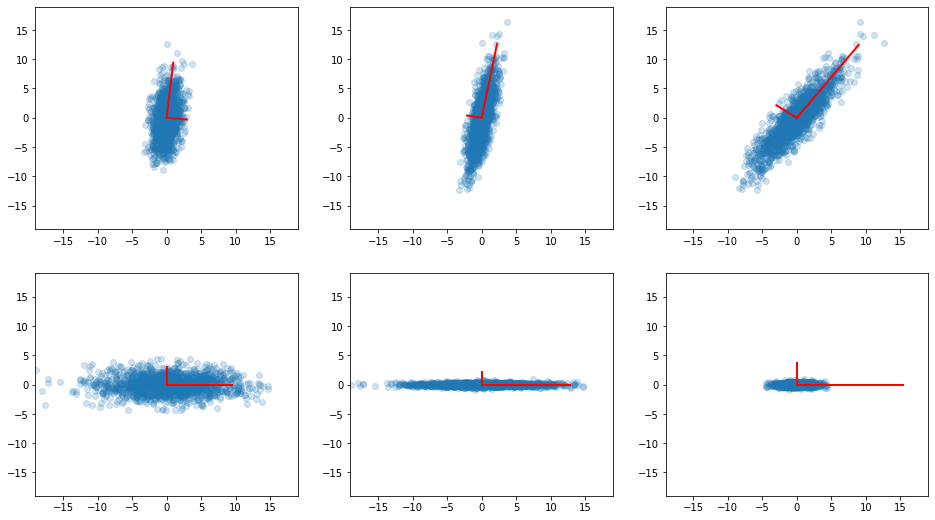

In [7]:
mu = np.zeros(10) # centered on 0
cv = np.diag(np.full(10, 1/ 20)) # input covariance matrix: asymmetric sigmas

# Generate random numbers according to a 2D normal distribution
Xnoise = np.random.multivariate_normal(mu, cv, N).T

Xaug = np.row_stack((X, Xnoise))

# Eigenvectors and eigenvaues using eigendecomposition of the covariance matrix
cov = np.cov(Xaug)
#print("cov:\n", cov, '\n')

l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues using eigendecomposition:\n", l, '\n')
print("Eigenvectors using eigendecomposition:\n", V, '\n')

# Eigenvectors and eigenvalues using the SVD
U, S, Vt = np.linalg.svd(Xaug)
l_svd = S**2/(N-1)
V_svd = U
print("Eigenvalues using SVD:\n", l_svd, '\n')
print("Eigenvectors using SVD:\n", V_svd, '\n')

# Percentage of dataset's variability
explained_variances = []
for i in range(len(l_svd)):
    explained_variances.append(l_svd[i] / np.sum(l_svd))
 
print("Dataset's variability:", explained_variances, '\n')

# Redefining the data according to the new basis
Xp = np.dot(V_svd.T, Xaug)

X_12 = np.row_stack((X1, X2))
X_13 = np.row_stack((X1, X3))
X_23 = np.row_stack((X2, X3))

U, S, Vt = np.linalg.svd(X_12)
l_12 = S/math.sqrt(N-1)
V_12 = U

U, S, Vt = np.linalg.svd(X_13)
l_13 = S/math.sqrt(N-1)
V_13 = U

U, S, Vt = np.linalg.svd(X_23)
l_23 = S/math.sqrt(N-1)
V_23 = U

scale_factor = 3

xMaxVal = np.abs(Xaug).max()
xMaxVal = math.ceil(xMaxVal)
xpMaxVal = np.abs(Xp).max()
xpMaxVal = math.ceil(xpMaxVal)
xMaxVal = max(xMaxVal, xpMaxVal)

fig, axs = plt.subplots(2, 3, figsize= (16,9))

ax = axs[0, 0]
displaySubplot(ax, xMaxVal, Xaug[0,:], Xaug[1,:], l_12, V_12, scale_factor)

ax = axs[0, 1]
displaySubplot(ax, xMaxVal, Xaug[0,:], Xaug[2,:], l_13, V_13, scale_factor)

ax = axs[0, 2]
displaySubplot(ax, xMaxVal, Xaug[1,:], Xaug[2,:], l_23, V_23, scale_factor)

ax = axs[1, 0]
displaySubplot(ax, xMaxVal, Xp[0,:], Xp[1,:], l_12, np.dot(V_12.T, V_12), scale_factor)

ax = axs[1, 1]
displaySubplot(ax, xMaxVal, Xp[0,:], Xp[2,:], l_13, np.dot(V_13.T, V_13), scale_factor)

ax = axs[1, 2]
displaySubplot(ax, xMaxVal, Xp[1,:], Xp[2,:], l_23, np.dot(V_23.T, V_23), scale_factor)

plt.show()

# After removing correlation via the computed eigenvector, the resulting uncorrelated features have more
# variance than the previous one, due to the uncertanties introduced in the computation by the random noise.
# In fact, the 3rd domninant component is no longer related to the previous linear combination of the first two, but
# it is related to added random components. Moreover, the first and the second feature explain a little less
# than 99% of data variability.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

Eigenvalues using SVD:
 [4.22421299 1.57527072 1.01185852 0.99406496 0.74205841 0.65012065
 0.40756003 0.22037401 0.15476152 0.02024398] 

Dataset's variability:
 [0.42239908994124764, 0.15751879016646061, 0.1011805319927156, 0.09940126973824909, 0.07420193941999671, 0.06500864672999739, 0.04075385976690105, 0.02203624269160869, 0.015475338121816345, 0.0020242914310067356] 


Dataset's cumulative variability:
 [0.42239909 0.57991788 0.68109841 0.78049968 0.85470162 0.91971027
 0.96046413 0.98250037 0.99797571 1.        ] 


The number of features needed to explain more than 99% of the data variability is:
 9 




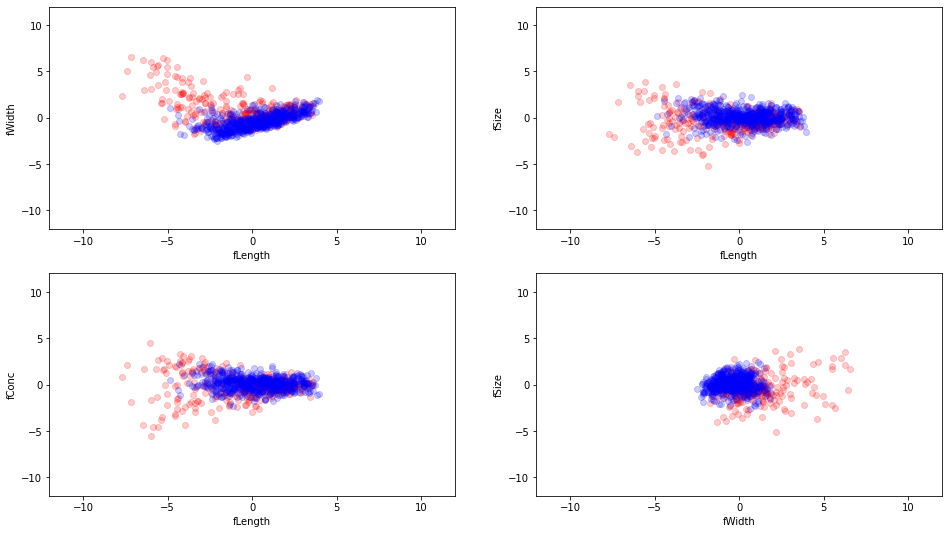

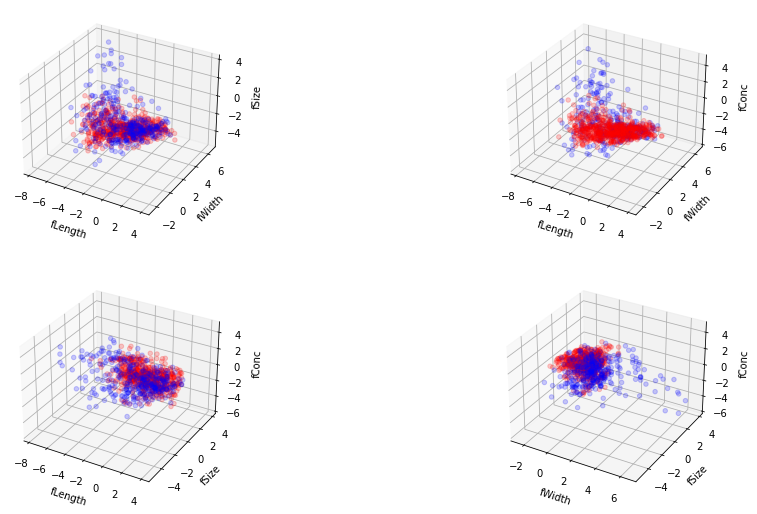

In [8]:
import pandas as pd
import os

script_dir = directory_path = os.getcwd()
filepath = "data\magic04.data"
abs_file_path = os.path.join(script_dir, filepath)

# MAGIC dataset features description
# 1. fLength: continuous # major axis of ellipse [mm]
# 2. fWidth: continuous # minor axis of ellipse [mm]
# 3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
# 4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
# 5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
# 6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
# 7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
# 8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
# 9. fAlpha: continuous # angle of major axis with vector to origin [deg]
# 10. fDist: continuous # distance from origin to center of ellipse [mm]
# 11. class: g,h # gamma (signal), hadron (background)

df = pd.read_csv(abs_file_path, header=None)
colnames = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] 
df.columns = colnames

gamma = df.loc[df['class'] == 'g']
Ngamma = gamma.values.shape[0]

# Keep only feature: do not retain the class labels
X = df.iloc[:,0:10].values

# Normalize input features to have zero mean and unit standard deviation
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
Xnorm = scaler.transform(X)

# Feature in a row wise 
X = Xnorm.T

# Number of samples
N = X.shape[1]

# Perform SVD on data
U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(N-1)
V_svd = U
print("Eigenvalues using SVD:\n", l_svd, '\n')

# Percentage of dataset's variability
explained_variances = []
for i in range(len(l_svd)):
    explained_variances.append(l_svd[i] / np.sum(l_svd))

print("Dataset's variability:\n", explained_variances, '\n')
print()

cumumlative_explained_variances = np.cumsum(explained_variances)
print("Dataset's cumulative variability:\n", cumumlative_explained_variances, '\n')
print()

numFeatures = np.argmax(cumumlative_explained_variances >= 0.99) + 1
print("The number of features needed to explain more than 99% of the data variability is:\n", numFeatures, '\n')
print()

# Compute PCA features via eigenvector matrix multiplication
Xp = np.dot(V_svd.T, X)

# Compute max axis span
xMaxVal = np.abs(Xp).max()
xMaxVal = math.ceil(xMaxVal)

# Decimetion factor used to draw scatter plots
dec=20

# Plot 2D scatter plot of some couples of relevant features
subPlots = [221, 222, 223, 224]
indecesFeats = [[0, 1], [0, 2], [0, 3], [1, 2]]
fig = plt.figure(figsize= (16,9))
for subplt, iFeats in zip (subPlots, indecesFeats):
    ax = fig.add_subplot(subplt)
    iFeat1 = iFeats[0]
    iFeat2 = iFeats[1]
    ax.scatter(Xp[iFeat1,Ngamma::dec], Xp[iFeat2,Ngamma::dec], alpha=0.2, facecolor='r')
    ax.scatter(Xp[iFeat1,:Ngamma:dec], Xp[iFeat2,:Ngamma:dec], alpha=0.2, facecolor='b')
    ax.set_xlabel(colnames[iFeat1])
    ax.set_ylabel(colnames[iFeat2])
    ax.set_xlim([-xMaxVal, xMaxVal])
    ax.set_ylim([-xMaxVal, xMaxVal])

plt.show()

# Plot £D scatter plot of some triplets of relevant features
indecesFeats = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]
fig = plt.figure(figsize= (16,9))
for subplt, iFeats in zip (subPlots, indecesFeats):
    ax = fig.add_subplot(subplt, projection='3d')
    iFeat1 = iFeats[0]
    iFeat2 = iFeats[1]
    iFeat3 = iFeats[2]
    ax.scatter3D(Xp[iFeat1,:Ngamma:dec], Xp[iFeat2,:Ngamma:dec], Xp[iFeat3,:Ngamma:dec], alpha=0.2, facecolor='r')
    ax.scatter3D(Xp[iFeat1,Ngamma::dec], Xp[iFeat2,Ngamma::dec], Xp[iFeat3,Ngamma::dec], alpha=0.2, facecolor='b')
    ax.set_xlabel(colnames[iFeat1])
    ax.set_ylabel(colnames[iFeat2])
    ax.set_zlabel(colnames[iFeat3])

plt.show()